# Hacker News Data Analysis using Python 

I'll be working with a dataset that has submissions to Hacker News from 2006 to 2015. Hacker News is a site where users can submit articles from across the internet (usually about technology and startups), and others can "upvote" the articles, signifying that they like them. The more upvotes a submission gets, the more popular it was in the community. Popular articles get to the "front page" of Hacker News, where they're more likely to be seen by others.

You may download the dataset from [here](https://github.com/arnauddri/hn/blob/master/data/stories.7z). It worth mentioning that it has 1,553,934 entries

#### Loading Dataset

In [1]:
import pandas as pd

data = pd.read_csv("stories.csv")

data.columns = ["id", "created_at", "created_at_i", "author", "points", "url_hostname", "num_comments", "title"]

data.head()

,id,created_at,created_at_i,author,points,url_hostname,num_comments,title
0,9079983,2015-02-20T11:34:22.000Z,1424432062,Rutger24s,1,startupjuncture.com,0,24sessions: live business advice over video-chat
1,9079986,2015-02-20T11:35:32.000Z,1424432132,AndrewDucker,3,blog.erratasec.com,0,Some notes on SuperFish
2,9079988,2015-02-20T11:36:18.000Z,1424432178,davidiach,1,twitter.com,0,Apple Watch models could contain 29.16g of gold
3,9080000,2015-02-20T11:41:06.000Z,1424432466,CiaranR,1,phpconference.co.uk,0,PHP UK Conference Diversity Scholarship Programme
4,9080006,2015-02-20T11:43:04.000Z,1424432584,mstolpm,2,preview.onedrive.com,2,Microsoft giving away 100GB free OneDrive stor...


#### What words appear most often in the headlines?

In [2]:
import collections as cl

all_titles = ''

for line in data["title"]:
    all_titles+=str(line) + ' '

words = all_titles.lower().split(' ')

c = cl.Counter(words)

c.most_common(20)

[('the', 331506),
 ('to', 263390),
 ('a', 208287),
 ('of', 182585),
 ('for', 177458),
 ('in', 155726),
 ('and', 146612),
 ('', 114528),
 ('on', 99864),
 ('is', 96621),
 ('with', 85871),
 ('how', 84466),
 ('hn:', 83996),
 ('your', 75014),
 ('-', 73723),
 ('you', 62178),
 ('ask', 58810),
 ('new', 51081),
 ('google', 47700),
 ('from', 46876)]

#### What domains were submitted most often to Hacker News?

In [3]:
import tldextract as tld

def only_domain(domain):
    if type(domain) != str:
        return ''
    tld_obj = tld.extract(domain)
    return tld_obj.domain + "." + tld_obj.suffix

data["url_hostname"] = data["url_hostname"].apply(only_domain)

urls = cl.Counter(data["url_hostname"])

urls.most_common(10)

[('', 94735),
 ('blogspot.com', 36831),
 ('github.com', 30318),
 ('techcrunch.com', 26609),
 ('nytimes.com', 24125),
 ('youtube.com', 22030),
 ('google.com', 16307),
 ('wordpress.com', 15537),
 ('medium.com', 12992),
 ('arstechnica.com', 12336)]

#### What authors with no domains submitted most often to Hacker News?

In [4]:
authors = cl.Counter(data["author"][data["url_hostname"] == ''])

authors.most_common(10)

[('amichail', 525),
 ('anujkk', 143),
 ('rokhayakebe', 137),
 ('marcamillion', 124),
 ('hoodoof', 114),
 ('andrewstuart', 114),
 ('ColinWright', 110),
 ('whoishiring', 110),
 ('petervandijck', 109),
 ('diminium', 105)]

#### At what day of week, month and hour are the most articles submitted?

In [5]:
import dateutil

data["created_at"] = data["created_at"].apply(dateutil.parser.parse)

data["hour"] = data["created_at"].dt.hour
data["dayofweek"] = data["created_at"].dt.dayofweek
data["dayofmonth"] = data["created_at"].dt.day

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
data['dayofweek'] = data['dayofweek'].apply(lambda x: days[x])

In [6]:
print("Best day of month: ",[x for x,y in data["dayofmonth"].value_counts()[:10].iteritems()])
print("Best day of week: ",[x for x,y in data["dayofweek"].value_counts()[:3].iteritems()])
print("Best hour of day: ",[x for x,y in data["hour"].value_counts()[:5].iteritems()])

Best day of month:  [19, 9, 18, 10, 20, 17, 3, 12, 11, 16]
Best day of week:  ['Tues', 'Weds', 'Thurs']
Best hour of day:  [16, 17, 15, 18, 14]


#### What headline length leads to the most upvotes?

In [7]:
def tit_len(inp):
    return len(str(inp))

data["tit_len"] = data["title"].apply(tit_len)

best_len = data[["points","tit_len"]].sort_values("points",ascending=False)[:1000]["tit_len"].mean()

print("Best length mean based on top 1000 voted posts: ", best_len)

Best length mean based on top 1000 voted posts:  38.307


#### What submission hour leads to the most upvotes?

In [8]:
best_hour = data[["points","hour"]].sort_values("points",ascending=False)[:1000]["hour"].mean()

print("Best posting hour mean based on top 1000 voted posts: ", best_hour)

Best posting hour mean based on top 1000 voted posts:  14.273


#### How are the total numbers of upvotes changing over time? (trend)

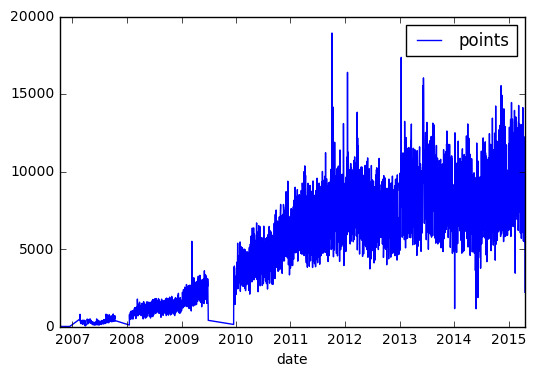

In [9]:
import matplotlib.pyplot as plt

data["date"] = data["created_at"].dt.date

df = data[["date","points"]].groupby("date").sum()

df.plot()

plt.show()

---
---
### That's it!

Prepared by Issam Hijazi

https://ae.linkedin.com/in/ihijazi

@iHijazi